In [1]:
#importing variables
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import matplotlib.dates as mpl_dates
import seaborn as sns
import matplotlib.pyplot as plt
import math
from openpyxl import load_workbook
# Find local peaks
from scipy.signal import argrelextrema
import yfinance as yf
import talib, datetime

In [2]:
# Function to get Bollinger Bands
def getBBands(df, period=10, stdNbr=2):
        try:
            close = df['Close']
        except Exception as ex:
            return None

        try:
            upper, middle, lower = talib.BBANDS(
                                close.values, 
                                timeperiod=period,
                                # number of non-biased standard deviations from the mean
                                nbdevup=stdNbr,
                                nbdevdn=stdNbr,
                                # Moving average type: simple moving average here
                                matype=0)
        except Exception as ex:
            return None

        data = dict(upper=upper, middle=middle, lower=lower, close=close)
        df = pd.DataFrame(data, index=df.index, columns=['upper', 'middle', 'lower','close']).dropna()

        return df 


In [3]:
# Import data for the year of ticker(s)
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []
tickers_final = ['spy']

for i in tickers_final:
    try:
        test_data = yf.download(tickers=i, period = '1y', interval = '1d')
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except Exception as e:
        no_data.append(i)
        print(e)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Makes RSI column and initializes RSI parameter variables
all_data['RSI'] = talib.RSI(all_data.Close, timeperiod=20)
lower_barrier = 30
upper_barrier = 70
width = 10

# Sets up different dataset for finding RSI divergence
Data = all_data.copy()
Data.drop(['Adj Close','Volume', 'symbol'], axis=1, inplace=True)
Data.head(20)

,Open,High,Low,Close,RSI
Date,,,,,
2020-07-07,315.380005,317.519989,313.369995,313.779999,NaN
2020-07-08,314.609985,316.299988,312.700012,316.179993,NaN
2020-07-09,316.839996,317.100006,310.679993,314.380005,NaN
2020-07-10,314.309998,317.880005,312.760010,317.589996,NaN
2020-07-13,320.130005,322.709991,314.130005,314.839996,NaN
2020-07-14,313.299988,319.760010,312.000000,318.920013,NaN
2020-07-15,322.410004,323.040009,319.269989,321.850006,NaN
2020-07-16,319.790009,321.279999,319.089996,320.790009,NaN
2020-07-17,321.880005,322.570007,319.739990,321.720001,NaN


In [5]:
Data['Bullish Divergence'] = ""
Data['Bearish Divergence'] = ""

# Bullish Divergence
for i in range(len(Data)):
    try:
        if Data.iloc[i, 4] < lower_barrier:
            for a in range(i + 1, i + width): 
                if Data.iloc[a, 4] > lower_barrier:
                    for r in range(a + 1, a + width):
                        if Data.iloc[r, 4] < lower_barrier and Data.iloc[r, 4] > Data.iloc[i, 4] and Data.iloc[r, 3] < Data.iloc[i, 3]:
                            for s in range(r + 1, r + width):
                                if Data.iloc[s, 4] > lower_barrier:
                                    print('Bullish above',Data.iloc[s+1,2])
                                    Data.iloc[s + 1, 5] = 1
                                    break
                                else:
                                    continue
                        else:
                            continue
                else:
                    continue
        else:
            continue
    except IndexError:
        pass
    
#Bearish Divergence
for i in range(len(Data)):
    try:
        if Data.iloc[i, 4] > upper_barrier:
            for a in range(i + 1, i + width): 
                if Data.iloc[a, 4] < upper_barrier:
                    for r in range(a + 1, a + width):
                        if Data.iloc[r, 4] > upper_barrier and Data.iloc[r, 4] < Data.iloc[i, 4] and Data.iloc[r, 3] > Data.iloc[i, 3]:
                            for s in range(r + 1, r + width):
                                if Data.iloc[s, 4] < upper_barrier:
                                    print('Bearish below',Data.iloc[s+1,2])
                                    Data.iloc[s + 1, 6] = -1
                                    break
                                else:
                                    continue
                        else:
                            continue
                else:
                    continue
        else:
            continue
    except IndexError:
        pass

Bearish below 335.6199951171875
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 334.8699951171875
Bearish below 335.6199951171875
Bearish below 335.2200012207031
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 335.2200012207031
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 335.2200012207031
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 334.8699951171875
Bearish below 334.8699951171875
Bearish below 335.6199951171875
Bearish below 335.2200012207031
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 335.2200012207031
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 335.2200012207031
Bearish below 335.2200012207031
Bearish below 334.8699951171875
Bearish below 334.8699951171875
Bearish 

In [6]:
Data.tail(60)

,Open,High,Low,Close,RSI,Bullish Divergence,Bearish Divergence
Date,,,,,,,
2021-04-12,410.850006,411.929993,410.200012,411.640015,67.569529,,
2021-04-13,411.529999,413.529999,411.119995,412.859985,68.351076,,
2021-04-14,412.829987,413.959991,410.869995,411.450012,66.404213,,
2021-04-15,413.739990,416.160004,413.690002,415.869995,69.290557,,
2021-04-16,417.250000,417.910004,415.730011,417.260010,70.139798,,
2021-04-19,416.260010,416.739990,413.790009,415.209991,67.252559,,
2021-04-20,413.910004,415.089996,410.589996,412.170013,63.192144,,
2021-04-21,411.510010,416.290009,411.359985,416.070007,65.966949,,
2021-04-22,415.890015,416.779999,411.130005,412.269989,61.232474,,


In [7]:
# Creates Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 
all_data.head(5)

,Open,High,Low,Close,Adj Close,Volume,symbol,RSI,return
Date,,,,,,,,,
2020-07-07,315.380005,317.519989,313.369995,313.779999,309.174957,82910000,spy,NaN,NaN
2020-07-08,314.609985,316.299988,312.700012,316.179993,311.539764,54638600,spy,NaN,0.007649
2020-07-09,316.839996,317.100006,310.679993,314.380005,309.766174,83354200,spy,NaN,-0.005693
2020-07-10,314.309998,317.880005,312.760010,317.589996,312.929077,57550400,spy,NaN,0.010211
2020-07-13,320.130005,322.709991,314.130005,314.839996,310.219391,102997500,spy,NaN,-0.008659


In [8]:
# Fixes index problem
all_data = all_data[~all_data.index.duplicated()]

# Columns dropped for testing
# all_data.drop(index=all_data.index[:-65], axis=0, inplace=True)
# all_data.drop(index=all_data.index[-20:], axis=0, inplace=True)
all_data.tail(4)

,Open,High,Low,Close,Adj Close,Volume,symbol,RSI,return
Date,,,,,,,,,
2021-06-30,427.209991,428.779999,427.179993,428.059998,428.059998,64827900,spy,61.065689,0.000842
2021-07-01,428.869995,430.600006,428.799988,430.429993,430.429993,53441000,spy,63.431593,0.005537
2021-07-02,431.670013,434.100006,430.519989,433.720001,433.720001,57679000,spy,66.413885,0.007644
2021-07-06,433.779999,434.000000,430.010010,432.929993,432.929993,68148765,spy,65.072502,-0.001821


In [9]:
# Tries with refinement level 4
n = 4
all_data['min'] = all_data.iloc[argrelextrema(all_data['Close'].values, np.less_equal,
                    order=n)[0]]['Close']
all_data['max'] = all_data.iloc[argrelextrema(all_data['Close'].values, np.greater_equal,
                    order=n)[0]]['Close']

In [10]:
# Tries with refinement level 20
n = 12
all_data['min1'] = all_data.iloc[argrelextrema(all_data['Close'].values, np.less_equal,
                    order=n)[0]]['Close']
all_data['max1'] = all_data.iloc[argrelextrema(all_data['Close'].values, np.greater_equal,
                    order=n)[0]]['Close']

In [11]:
# Extra refinement level (optional)
n = 25
all_data['min4'] = all_data.iloc[argrelextrema(all_data['Close'].values, np.less_equal,
                    order=n)[0]]['Close']
all_data['max4'] = all_data.iloc[argrelextrema(all_data['Close'].values, np.greater_equal,
                    order=n)[0]]['Close']
all_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,symbol,RSI,return,min,max,min1,max1,min4,max4
Date,,,,,,,,,,,,,,,
2021-06-29,427.880005,428.559998,427.130005,427.700012,427.700012,35970500,spy,60.698781,0.000538,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,427.209991,428.779999,427.179993,428.059998,428.059998,64827900,spy,61.065689,0.000842,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,428.869995,430.600006,428.799988,430.429993,430.429993,53441000,spy,63.431593,0.005537,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-02,431.670013,434.100006,430.519989,433.720001,433.720001,57679000,spy,66.413885,0.007644,NaN,433.720001,NaN,433.720001,NaN,433.720001
2021-07-06,433.779999,434.000000,430.010010,432.929993,432.929993,68148765,spy,65.072502,-0.001821,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Draws lines for the mins and maxes - first performs shift operations
all_data['prev_min'] = all_data['min'].shift(1)
all_data['min'] = all_data.apply(lambda x : 0  if ((x['min'] == x['prev_min'])) else x['min'], axis=1)
all_data['prev_max'] = all_data['max'].shift(1)
all_data['max'] = all_data.apply(lambda x : 0  if ((x['max'] == x['prev_max'])) else x['max'], axis=1)

all_data['prev_min1'] = all_data['min1'].shift(1)
all_data['min1'] = all_data.apply(lambda x : 0  if ((x['min1'] == x['prev_min1'])) else x['min1'], axis=1)
all_data['prev_max1'] = all_data['max1'].shift(1)
all_data['max1'] = all_data.apply(lambda x : 0  if ((x['max1'] == x['prev_max1'])) else x['max1'], axis=1)

all_data['prev_min2'] = all_data['min4'].shift(1)
all_data['min4'] = all_data.apply(lambda x : 0  if ((x['min4'] == x['prev_min2'])) else x['min4'], axis=1)
all_data['prev_max2'] = all_data['max4'].shift(1)
all_data['max4'] = all_data.apply(lambda x : 0  if ((x['max4'] == x['prev_max2'])) else x['max4'], axis=1)
# n = smaller number
all_data['min2'] = all_data['min'].replace({0:np.nan})
all_data.min2 = all_data['min2'].interpolate(method='spline', limit_direction='both',order = 1, axis=0)
all_data['max2'] = all_data['max'].replace({0:np.nan})
all_data.max2 = all_data['max2'].interpolate(method='spline', limit_direction='both',order = 1, axis=0)
# n = larger number
all_data['min3'] = all_data['min1'].replace({0:np.nan})
all_data.min3 = all_data['min3'].interpolate(method='spline', limit_direction='both',order = 1, axis=0)
all_data['max3'] = all_data['max1'].replace({0:np.nan})
all_data.max3 = all_data['max3'].interpolate(method='spline', limit_direction='forward',order = 1, axis=0)
# n = 2 (optional)
all_data['min5'] = all_data['min4'].replace({0:np.nan})
all_data.min5 = all_data['min5'].interpolate(method='spline', limit_direction='both',order = 1, axis=0)
all_data['max5'] = all_data['max4'].replace({0:np.nan})
all_data.max5 = all_data['max5'].interpolate(method='spline', limit_direction='both',order = 1, axis=0)

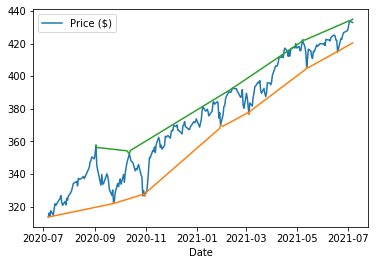

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(all_data.Close)
# plt.plot(all_data.Close)

plt.plot(all_data.min3)
plt.plot(all_data.max3)
plt.xlabel('Date')
plt.legend(['Price ($)'])
plt.show()

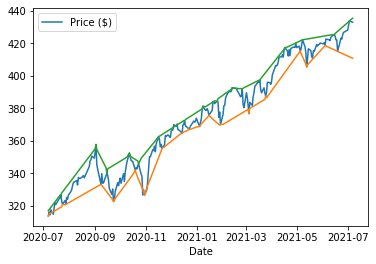

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(all_data.Close)
# plt.plot(all_data.Close)

plt.plot(all_data.min2)
plt.plot(all_data.max2)
plt.xlabel('Date')
plt.legend(['Price ($)'])
plt.show()

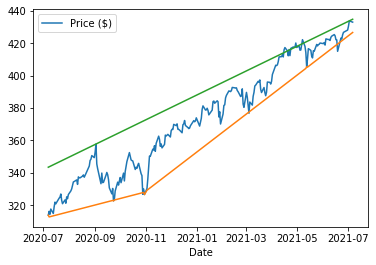

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(all_data.Close)
# plt.plot(all_data.Close)

plt.plot(all_data.min5)
plt.plot(all_data.max5)
plt.xlabel('Date')
plt.legend(['Price ($)'])
plt.show()

In [16]:
# Bollinger Band function used
all_data = all_data.merge(getBBands(all_data,period=20,stdNbr=2), on = 'Date')

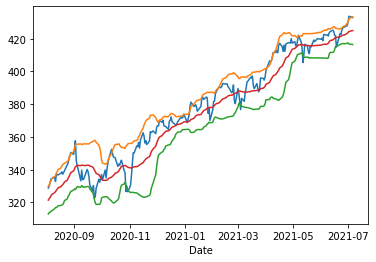

In [17]:
# Big picture
import matplotlib.pyplot as plt
plt.figure()
plt.plot(all_data.Close)
# plt.plot(all_data.High)
# plt.plot(all_data.Low)
# plt.plot(all_data.max5)
# plt.plot(all_data.min5)
# plt.plot(all_data.max2)
# plt.plot(all_data.min2)
plt.plot(all_data.upper)
plt.plot(all_data.lower)
plt.plot(all_data.middle)
plt.xlabel('Date')

# plt.legend(['Price ($)','Max5','Min5','Max3','Min3','Max2','Min2'], loc = 'upper left')
plt.show()

In [18]:
# We want notifications------------
# Buy/Sell when crosses middle band
# Bollinger Band............. yes
# RSI........................ no
# RSI Divergence............. yes
# MACD....................... no
# VWAP....................... yes
# RVI........................ yes
# MFI........................ yes
# Min & Max lines............ yes
# Candlestick Patterns....... no
# NEWS....................... yes
# Risk Analysis.............. yes
# Earnings & Financials...... yes
# Put/Call Ratio............. no
# Trending................... yes
# Consolodating.............. no
# Buy Score: 

In [19]:
all_data

,Open,High,Low,Close,Adj Close,Volume,symbol,RSI,return,min,...,min2,max2,min3,max3,min5,max5,upper,middle,lower,close
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-03,328.320007,329.619995,327.730011,328.790009,323.964722,53077900,spy,NaN,0.006952,NaN,...,322.648518,335.309051,316.562254,NaN,316.204307,350.173281,329.899845,321.443001,312.986156,328.790009
2020-08-04,327.859985,330.059998,327.859985,330.059998,325.216064,41917900,spy,67.741968,0.003863,NaN,...,322.944076,335.988341,316.668333,NaN,316.338030,350.424172,330.740752,322.257001,313.773249,330.059998
2020-08-05,331.470001,332.390015,331.179993,332.109985,327.235931,42697700,spy,69.191015,0.006211,NaN,...,323.239635,336.667632,316.774411,NaN,316.471753,350.675063,332.079388,323.053500,314.027612,332.109985
2020-08-06,331.480011,334.459991,331.130005,334.329987,329.423370,43679400,spy,70.691779,0.006685,NaN,...,323.535193,337.346922,316.880490,NaN,316.605476,350.925954,333.425036,324.050999,314.676963,334.329987
2020-08-07,333.279999,334.880005,332.299988,334.570007,329.659912,57308300,spy,70.853362,0.000718,NaN,...,323.830751,338.026212,316.986568,NaN,316.739200,351.176845,334.838327,324.900000,314.961673,334.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-29,427.880005,428.559998,427.130005,427.700012,427.700012,35970500,spy,60.698781,0.000538,NaN,...,412.394509,432.229026,418.379566,433.361158,423.784182,432.967328,428.706059,422.896498,417.086937,427.700012
2021-06-30,427.209991,428.779999,427.179993,428.059998,428.059998,64827900,spy,61.065689,0.000842,NaN,...,412.158157,432.677287,418.664155,433.584062,424.180100,433.218219,429.379589,423.282999,417.186408,428.059998
2021-07-01,428.869995,430.600006,428.799988,430.429993,430.429993,53441000,spy,63.431593,0.005537,NaN,...,411.921806,433.125547,418.948743,433.806966,424.576018,433.469110,430.342982,423.865999,417.389016,430.429993
